## Bernstein-Vazirani Algorithm

In [23]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2

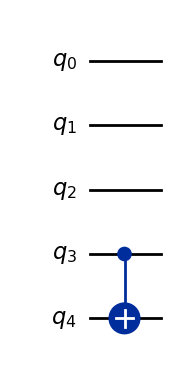

In [24]:
#Step 1 : Map the problem

def bv_function(s):
    qc = QuantumCircuit(len(s) + 1)            #for oracle Quantumcircuit(qubits) for others QuantumCircuit(classical_bits)
    for index,bit in enumerate(reversed(s)):   #enumerate() turns the string into pairs (index,bit)
        if bit == '1':
            qc.cx(index,len(s))
    return qc

display(bv_function("1000").draw("mpl"))   
# q[0]=0 , q[1]=0 , q[2]=0 , q[3]=1 -----> input register , q[4] -----> output (oracle) qubit

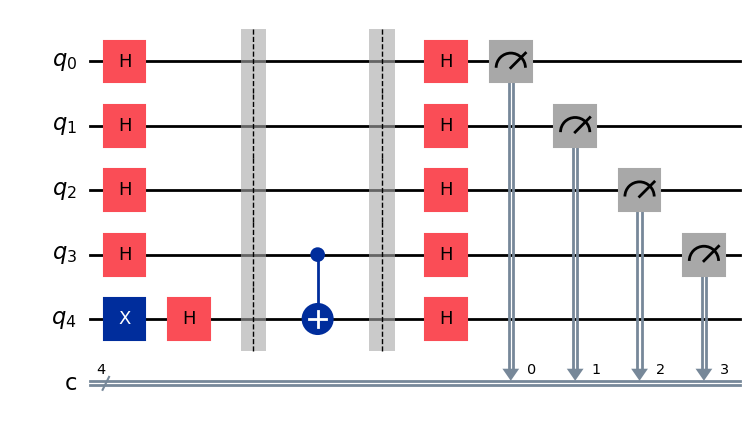

In [25]:
s = "1000"  #assuming this. this must not be known by user
n = len(s)

qc = QuantumCircuit(n+1,n)
qc.x(n)
qc.h(range(n+1))
qc.barrier()
qc.compose(bv_function(s),inplace=True)   # qc.compose(oracle, inplace = True)
qc.barrier()
qc.h(range(n+1))

qc.measure(range(n),range(n))
qc.draw("mpl")

In [26]:
backend = AerSimulator()
sampler_sim = BackendSamplerV2(backend=backend)
job = sampler_sim.run([qc],shots=1)
res = job.result()
counts = res[0].data.c.get_counts()
print(counts)

{'1000': 1}
